Iteracion número 0
Mejor posición global: [2.84272401 2.0943443 ], Mejor score: 0.033636583535520646
Iteracion número 1
Mejor posición global: [2.42175575 3.73999151], Mejor score: 0.033636583535520646
Iteracion número 2
Mejor posición global: [2.80498225 2.2418842 ], Mejor score: 0.033636583535520646
Iteracion número 3
Mejor posición global: [3.11014007 1.92503034], Mejor score: 0.017751285334142195
Iteracion número 4
Mejor posición global: [2.9382154  2.07517742], Mejor score: 0.009468981291537
Iteracion número 5
Mejor posición global: [2.87041607 2.4638318 ], Mejor score: 0.009468981291537
Iteracion número 6
Mejor posición global: [3.01897922 2.05651055], Mejor score: 0.0035536529667885043
Iteracion número 7
Mejor posición global: [3.01653529 2.13512293], Mejor score: 0.0035536529667885043
Iteracion número 8
Mejor posición global: [3.01666466 2.01310066], Mejor score: 0.00044933810237850376
Iteracion número 9
Mejor posición global: [3.16297986 1.46417733], Mejor score: 0.00044933810

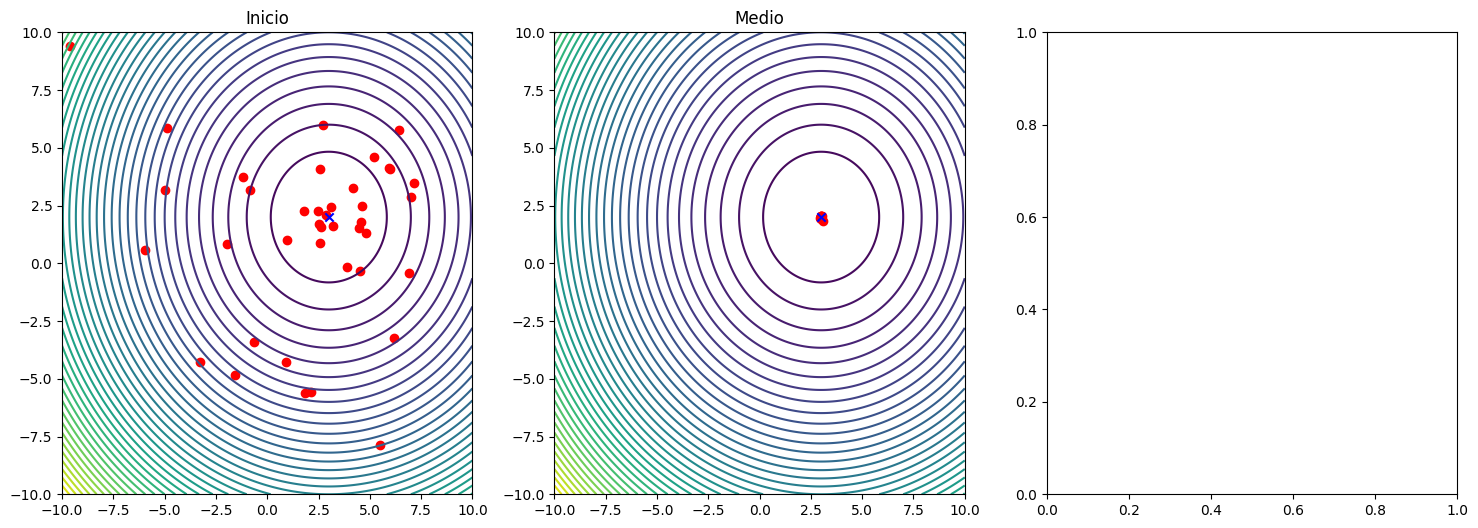

La mejor posición encontrada es [2.99902073 1.9990244 ] con un score de 1.9107541501682693e-06


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función a minimizar
def objective_function(x, y):
    return (x - 3) ** 2 + (y - 2) ** 2

# Parámetros del PSO
num_particles = 40
num_iterations = 100
w = 0.5
c1 = 1.5
c2 = 1.5
threshold = 1e-5

# Inicializar posiciones y velocidades de las partículas
np.random.seed(42)
positions = np.random.uniform(-10, 10, (num_particles, 2))
velocities = np.random.uniform(-1, 1, (num_particles, 2))
personal_best_positions = np.copy(positions)
personal_best_scores = objective_function(personal_best_positions[:, 0], personal_best_positions[:, 1])
global_best_position = personal_best_positions[np.argmin(personal_best_scores)]
global_best_score = np.min(personal_best_scores)

# Función para actualizar velocidad y posición
def update_velocity(velocity, position, personal_best, global_best):
    r1, r2 = np.random.rand(), np.random.rand()
    cognitive_component = c1 * r1 * (personal_best - position)
    social_component = c2 * r2 * (global_best - position)
    new_velocity = w * velocity + cognitive_component + social_component
    return new_velocity

def update_position(position, velocity):
    new_position = position + velocity
    return new_position

# Variables para graficar
contour_interval = num_iterations // 3
positions_history = []

# PSO loop
for i in range(num_iterations):
    print(f"Iteracion número {i}")
    for j in range(num_particles):
        velocities[j] = update_velocity(velocities[j], positions[j], personal_best_positions[j], global_best_position)
        positions[j] = update_position(positions[j], velocities[j])
        score = objective_function(positions[j][0], positions[j][1])
        
        if score < personal_best_scores[j]:
            personal_best_positions[j] = positions[j]
            personal_best_scores[j] = score
        
        if score < global_best_score:
            global_best_position = positions[j]
            global_best_score = score
    
    # Guardar posiciones para graficar
    if i % contour_interval == 0 or i == num_iterations - 1:
        positions_history.append(np.copy(positions))

    print(f"Mejor posición global: {global_best_position}, Mejor score: {global_best_score}")
    
    # Condición de término
    if global_best_score < threshold:
        break

# Graficar los resultados
x = np.linspace(-10, 10, 400)
y = np.linspace(-10, 10, 400)
X, Y = np.meshgrid(x, y)
Z = objective_function(X, Y)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for ax, pos, title in zip(axs, positions_history, ['Inicio', 'Medio', 'Final']):
    ax.contour(X, Y, Z, levels=50, cmap='viridis')
    ax.scatter(pos[:, 0], pos[:, 1], color='red')
    ax.scatter(global_best_position[0], global_best_position[1], color='blue', marker='x')
    ax.set_title(title)
    ax.set_xlim([-10, 10])
    ax.set_ylim([-10, 10])

plt.show()

print(f"La mejor posición encontrada es {global_best_position} con un score de {global_best_score}")
